In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import lsst.afw.display.rgb as rgb

In [2]:
import imp
import numpy as np
from scipy import constants

import lsst.daf.persistence as daf_persistence

In [3]:
def look(img, range=None, x_range=None, y_range=None, large=False):
    """Simple function to wrap matplotlib and display an image with a colorbar."""
    if large:
        plt.figure(figsize=(32, 12))
    else:
        plt.figure(figsize=(16, 6))
    if range is None:
        range = [np.min(img), np.max(img)]
#     img_use = np.clip(img, range[0], range[1])
    img_use = img.copy()
    if x_range is not None:
        x0 = int(x_range[0])
        x1 = int(x_range[1])
        if x0 < 0:
            img_use = np.roll(img_use, -x0, axis=1)
            x1 -= x0
            x0 = 0
        img_use = img_use[:, x0: x1]
    if y_range is not None:
        y0 = int(y_range[0])
        y1 = int(y_range[1])
        if y0 < 0:
            img_use = np.roll(img_use, -y0, axis=0)
            y1 -= y0
            y0 = 0
        img_use = img_use[y0: y1, :]
#     if preserve_scale:
#         img_use[0,0] = range[0]
#         img_use[-1,-1] = range[1]
    fig_show = plt.imshow(img_use, interpolation='none', origin='lower', cmap=cm.rainbow, clim=range)
    plt.colorbar(fig_show, orientation='vertical', shrink=1)
#    cbar.set_label('DCR (arcsec)', labelpad=0)
    plt.show()

In [4]:
repository = "/Users/sullivan/LSST/simulations/test6_new/output_data/"
obsid_range = np.arange(100, 124, 3)
filter_name = "g"
stretch_threshold = .1

In [5]:
from python.generateTemplate import GenerateTemplate
from python.buildDcrCoadd import BuildDcrCoadd

/Users/sullivan/LSST/code/lsstsw/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
self = BuildDcrCoadd(n_step=3, input_repository=repository, obsids=obsid_range, filter_name=filter_name)

In [11]:
info = vinfo = self.exposures[0].getInfo()
vinfo = info.getVisitInfo()

In [12]:
filt = info.getFilter()

In [14]:
filt.getFilterProperty().getLambdaMax()

552.0

In [7]:
import lsst.afw.image as afwImage

In [8]:
filt = afwImage.Filter("g")

In [9]:
filt.getFilterProperty().getLambdaMin()

405.0

bbox2.grow(-10)

exp = self.exposures[0]

mimage = exp.getMaskedImage()

mimage2 = mimage.Factory(mimage, bbox=bbox2)

mimage2.getBBox()

In [7]:
self.calc_psf_model(fast_psf_approximation=True)
look(self.psf.computeKernelImage().getArray())

TypeError: calc_psf_model() got an unexpected keyword argument 'fast_psf_approximation'

In [8]:
x0 = 150
dx = 65
y0 = 480
dy = 70

In [9]:
x0 = 840
dx = 50
y0 = 628
dy = 80

In [10]:
x0=400
dx=50
y0=500
dy=80

In [11]:
x0=200
dx=400
y0=300
dy=400

In [ ]:
self.build_model(max_iter=10, clamp=3., test_convergence=True, min_iter=5, max_slope=2.5, airmass_weight=True,
                 use_variance=True, frequency_regularization=False, spatial_filter=None,
                 refine_solution=True, stretch_threshold=stretch_threshold, convergence_threshold=1e-2)

Calculating initial solution... Done!
Fractional change per iteration:
Full initial convergence metric:  [ 0.09942573  0.09373149  0.07728789  0.06961265  0.05695376  0.05386281
  0.04649459  0.0444693 ]
Initial convergence metric: 0.067730
Iteration 0: delta=0.099595
Convergence-weighted gain used: 0.870211
Full convergence metric: [ 0.0747005   0.07030215  0.04091135  0.03863485  0.02030662  0.02727776
  0.0220135   0.02546865]
Iteration 0 convergence metric: 0.039952 (41.012762% change)
Iteration 1: delta=0.061045
Convergence-weighted gain used: 1.159798
Full convergence metric: [ 0.06406142  0.06189498  0.03155039  0.03296     0.0172446   0.02553792
  0.02361307  0.02620454]
Iteration 1 convergence metric: 0.035383 (11.435145% change)
Iteration 2: delta=0.043018
Convergence-weighted gain used: 1.089827
Full convergence metric: [ 0.05632685  0.05578255  0.02835656  0.02913661  0.01881153  0.02461738
  0.02537655  0.02691106]
Iteration 2 convergence metric: 0.033165 (6.269832% change

In [8]:
self.build_model(max_iter=40, clamp=3., test_convergence=True, min_iter=5, max_slope=2.5, airmass_weight=True,
                 use_variance=True, frequency_regularization=False, spatial_filter=None,
                 refine_solution=False, use_stretch=True, convergence_threshold=1e-3)

Calculating initial solution... Done!
Fractional change per iteration:
Full initial convergence metric:  [ 0.12529398  0.12376248  0.11645671  0.11049033  0.09735921  0.08932333
  0.08010072  0.07659925]
Convergence metric: 0.102423
Convergence-weighted gain used: 1.214462
Iteration 0: delta=0.124127
Full convergence metric: [ 0.08690662  0.08471362  0.06980315  0.06096313  0.0503376   0.04354014
  0.04829194  0.04874096]
Convergence metric: 0.061662
Convergence-weighted gain used: 1.027485
Iteration 1: delta=0.047684
Full convergence metric: [ 0.08225386  0.08267638  0.06651743  0.06064711  0.04817874  0.04210142
  0.04595059  0.04579478]
Convergence metric: 0.059265
Convergence-weighted gain used: 1.123334
Iteration 2: delta=0.027797
Full convergence metric: [ 0.07449238  0.07740558  0.06051861  0.05633665  0.04693467  0.03931402
  0.0461164   0.04627095]
Convergence metric: 0.055924
Convergence-weighted gain used: 1.062524
Iteration 3: delta=0.017740
Full convergence metric: [ 0.070

True

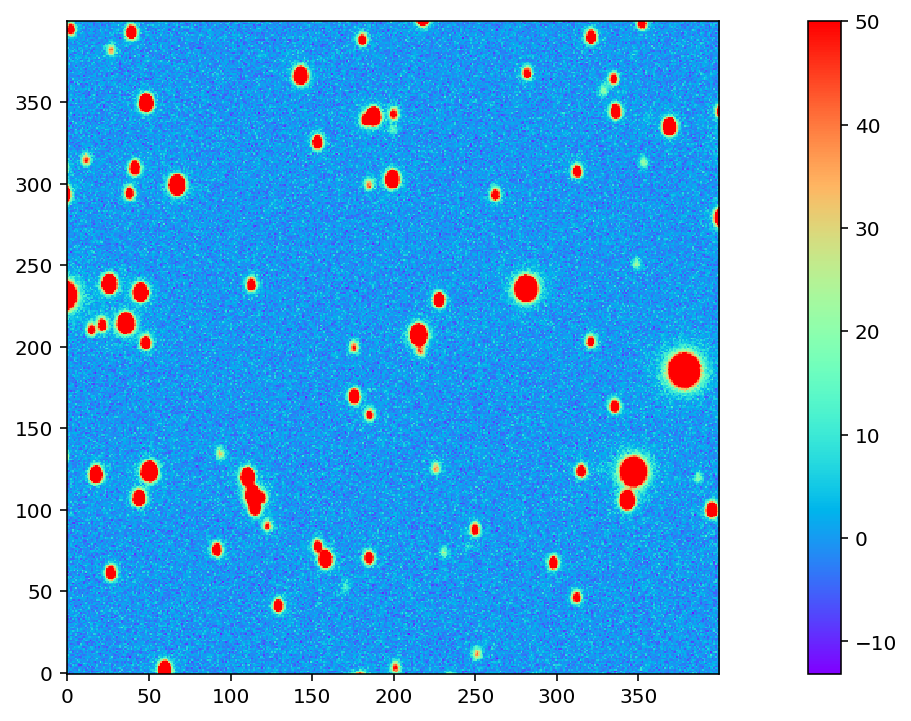

max:  19132.9 sum:  1.65795e+06
Matched-scale SUM


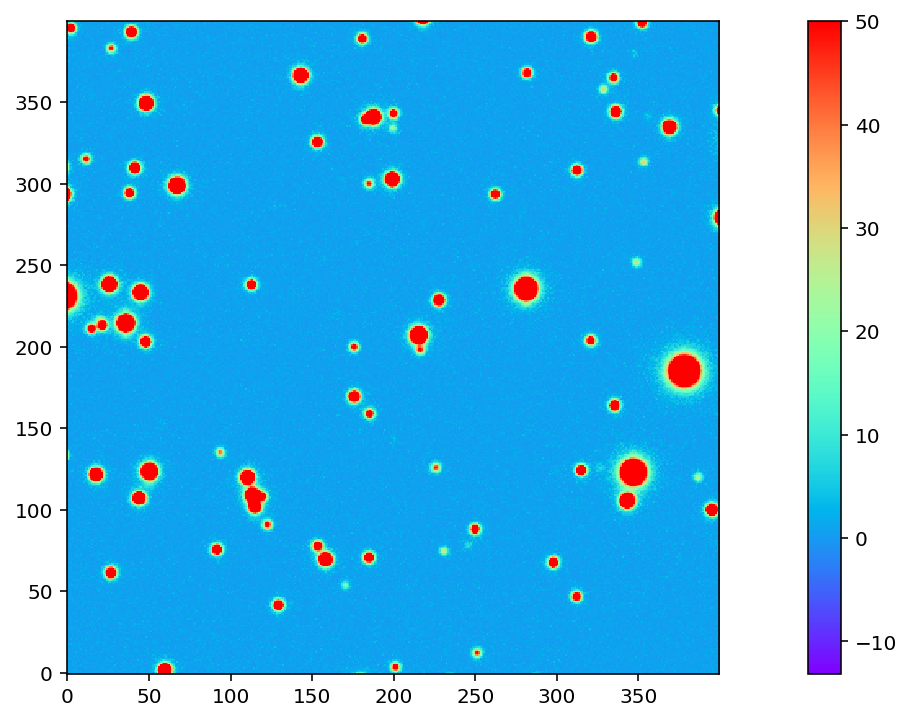

max:  27729.7597021 sum:  1776647.71559


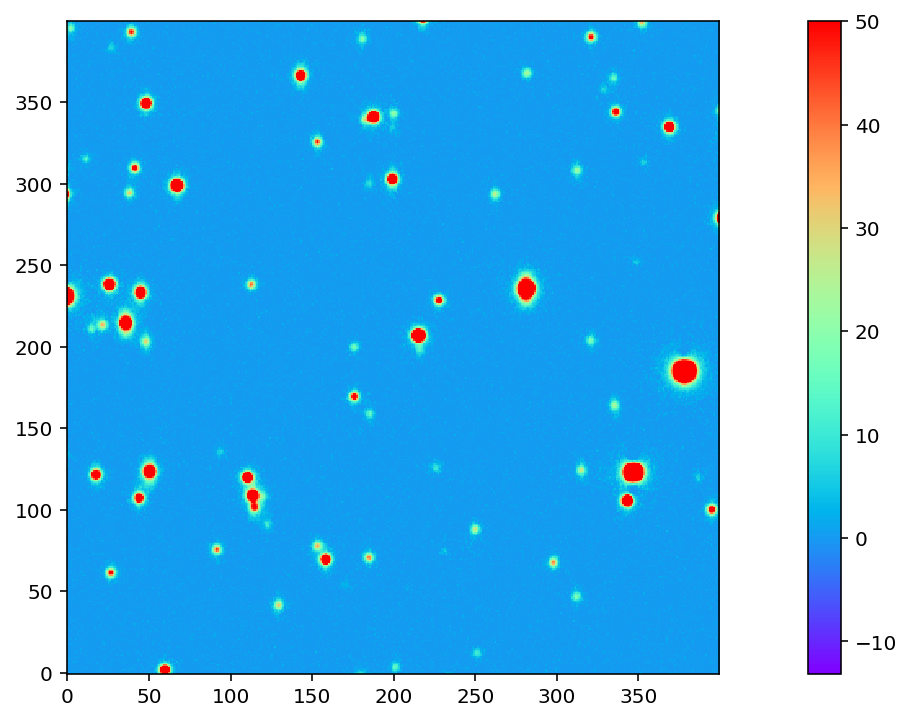

max:  8220.75489416 sum:  513391.674298


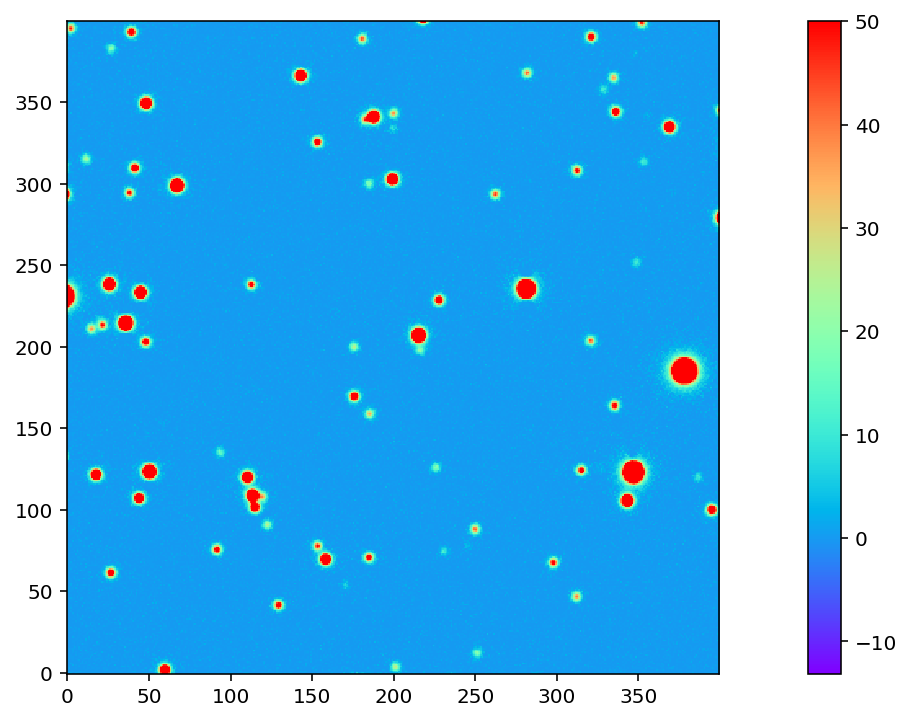

max:  10915.5592701 sum:  693647.008765


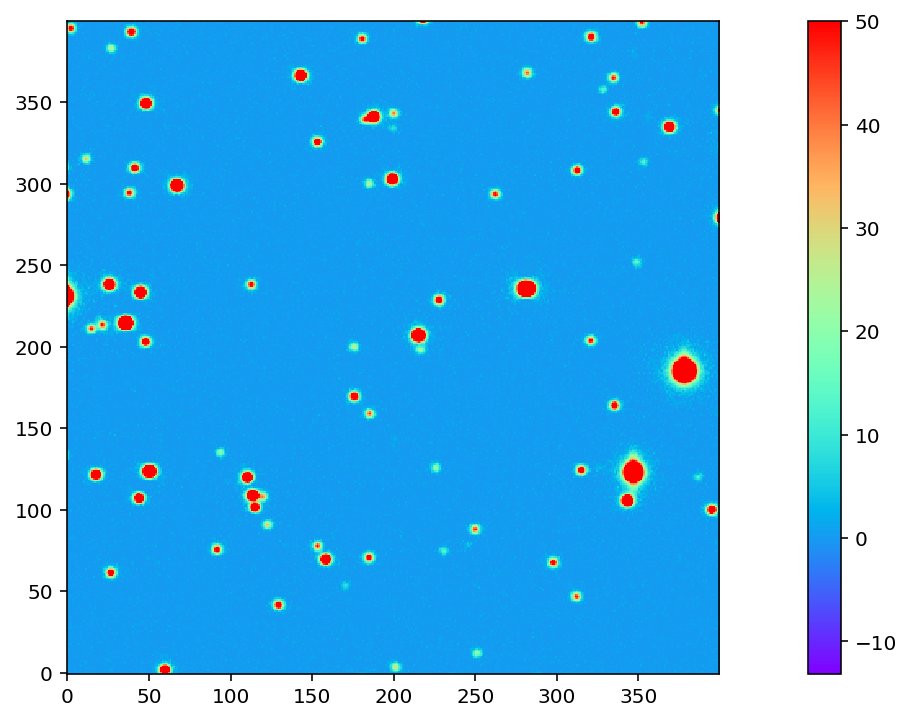

max:  8593.44553782 sum:  569609.032532
SUM


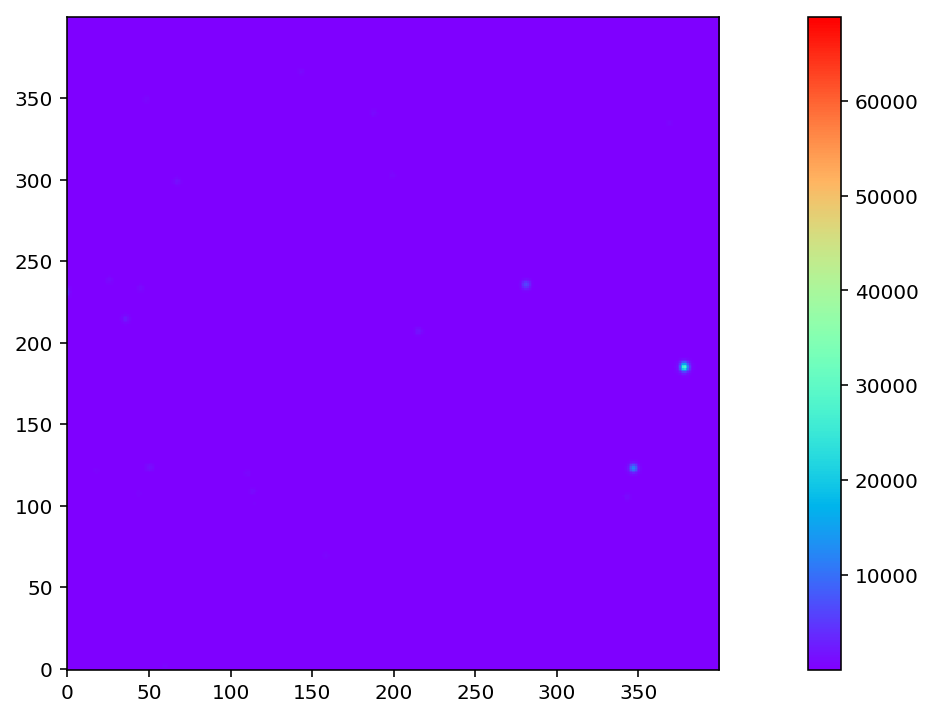

max:  27729.7597021 sum:  1776647.71559
DIFF last - first


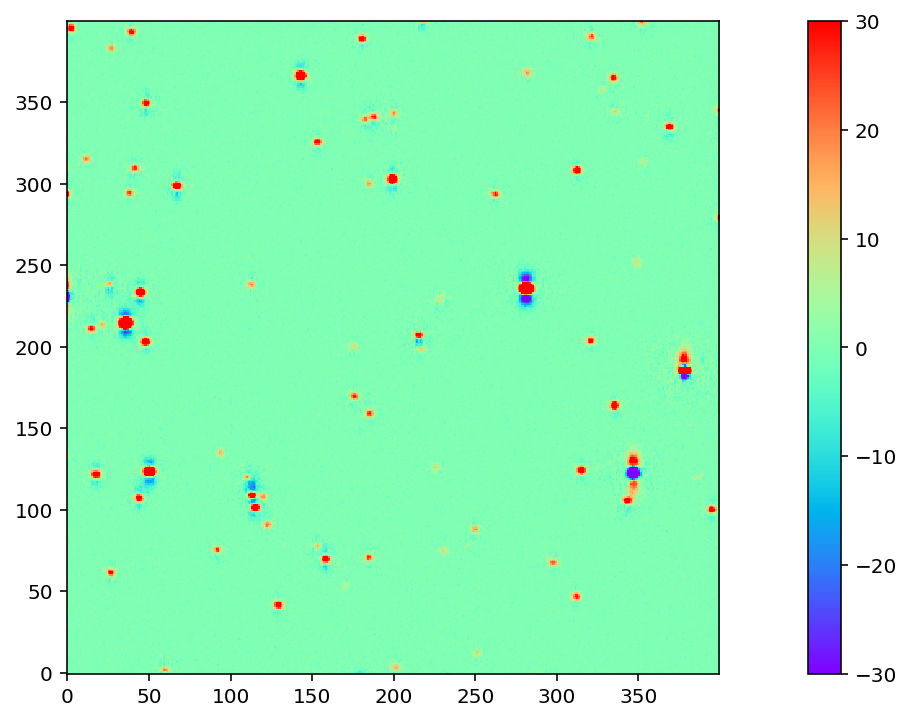

DIFF second - first


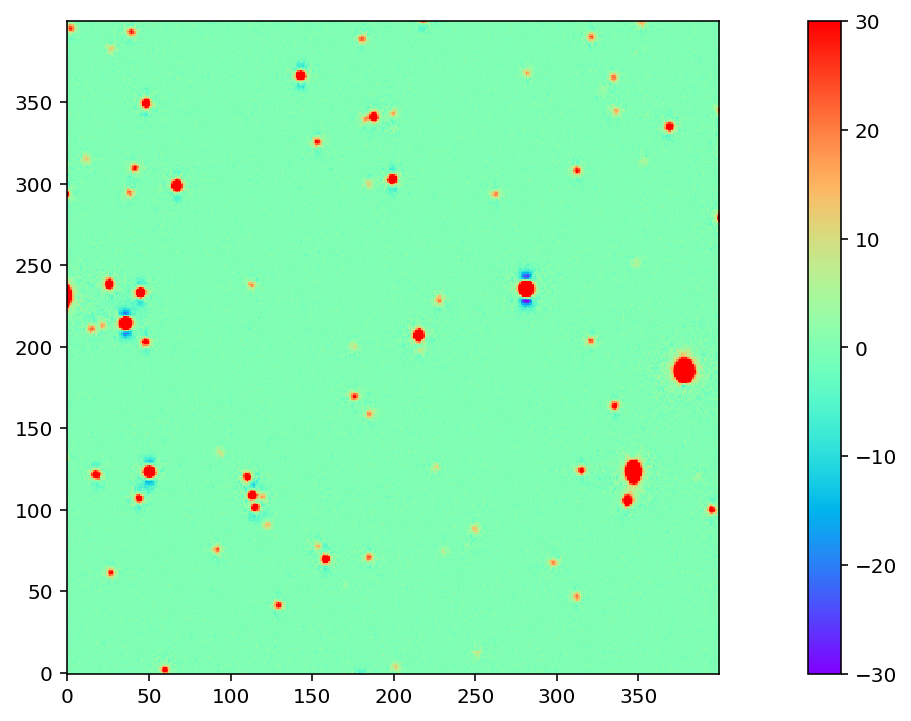

DIFF last - second to last


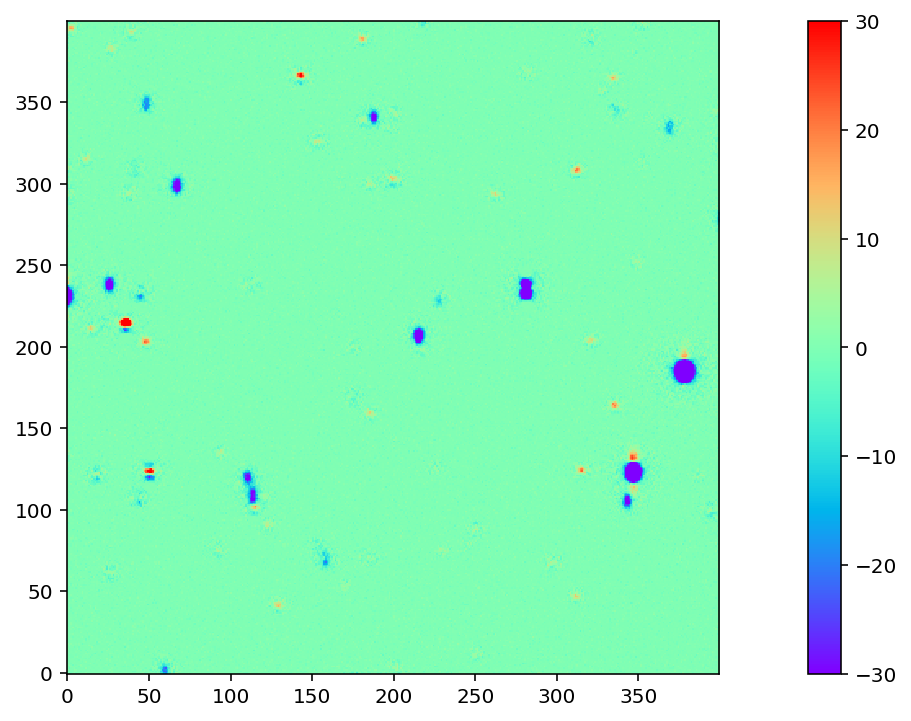

In [15]:
slice_inds = np.s_[y0: y0 + dy, x0: x0 + dx]
ref_im = self.exposures[0].getMaskedImage().getImage().getArray()[slice_inds]
min_use = np.min([np.min(ref_im),50.])
look(ref_im, range=[min_use,50])
print("max: ", np.max(ref_im), "sum: ", np.sum(ref_im))
rescale = 1.
sum_im = np.sum([self.model[_i]*rescale for _i in range(self.n_step)],axis=0)
print("Matched-scale SUM")
look(sum_im,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=[min_use,50])
print("max: ", np.max(sum_im[slice_inds]), "sum: ", np.sum(sum_im[slice_inds]))
for model in self.model:
    look(model*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=[min_use,50])
    print("max: ", np.max(model[slice_inds]*rescale),
          "sum: ", np.sum(model[slice_inds]*rescale))
print("SUM")
look(sum_im,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy])
print("max: ", np.max(sum_im[slice_inds]), "sum: ", np.sum(sum_im[slice_inds]))

diff_range = [-30, 30]
print("DIFF last - first")
look((self.model[-1] - self.model[0])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)
print("DIFF second - first")
look((self.model[1] - self.model[0])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)
print("DIFF last - second to last")
look((self.model[-1] - self.model[-2])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)


In [16]:
calexp_108 = self.butler.get("calexp", dataId={'visit': 108, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_109 = self.butler.get("calexp", dataId={'visit': 109, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_110 = self.butler.get("calexp", dataId={'visit': 110, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_112 = self.butler.get("calexp", dataId={'visit': 112, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_120 = self.butler.get("calexp", dataId={'visit': 120, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_121 = self.butler.get("calexp", dataId={'visit': 121, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})

In [21]:
output_repository="/Users/sullivan/LSST/simulations/test6_new/output_data_001b/"
template_exposure_gen = self.generate_templates_from_model(obsids=np.arange(24)+100,output_repository=output_repository,
                                                           output_obsid_offset=600, stretch_threshold=stretch_threshold)
im_arr = []
for exp in template_exposure_gen:
    pass
#     im_arr.append(exp.getMaskedImage().getImage().getArray())

Working on observation 51324 ... Done!
Working on observation 51836 ... Done!
Working on observation 52348 ... Done!
Working on observation 52860 ... Done!
Working on observation 53372 ... Done!
Working on observation 53884 ... Done!
Working on observation 54396 ... Done!
Working on observation 54908 ... Done!
Working on observation 55420 ... Done!
Working on observation 55932 ... Done!
Working on observation 56444 ... Done!
Working on observation 56956 ... Done!
Working on observation 57468 ... Done!
Working on observation 57980 ... Done!
Working on observation 58492 ... Done!
Working on observation 59004 ... Done!
Working on observation 59516 ... Done!
Working on observation 60028 ... Done!
Working on observation 60540 ... Done!
Working on observation 61052 ... Done!
Working on observation 61564 ... Done!
Working on observation 62076 ... Done!
Working on observation 62588 ... Done!
Working on observation 63100 ... Done!


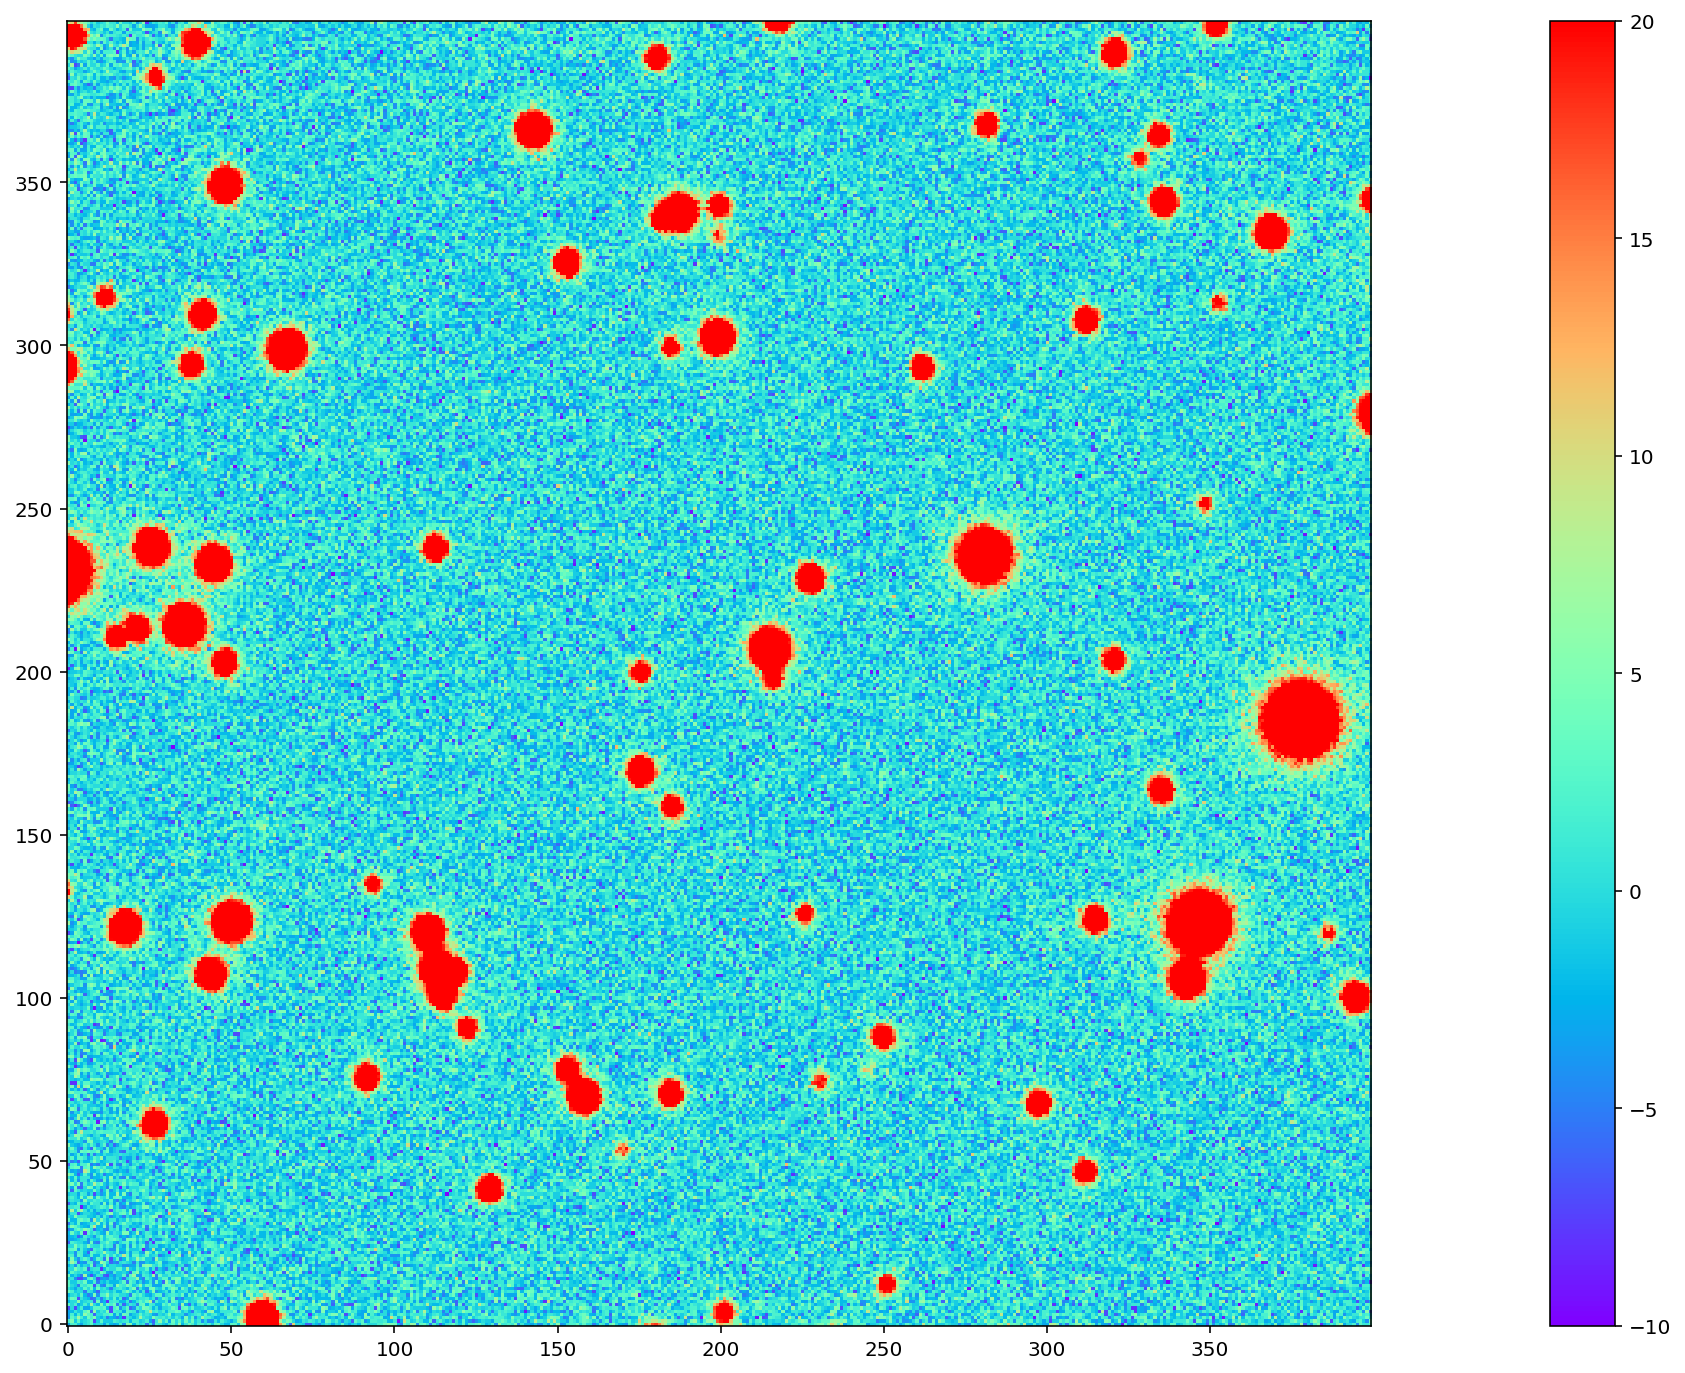

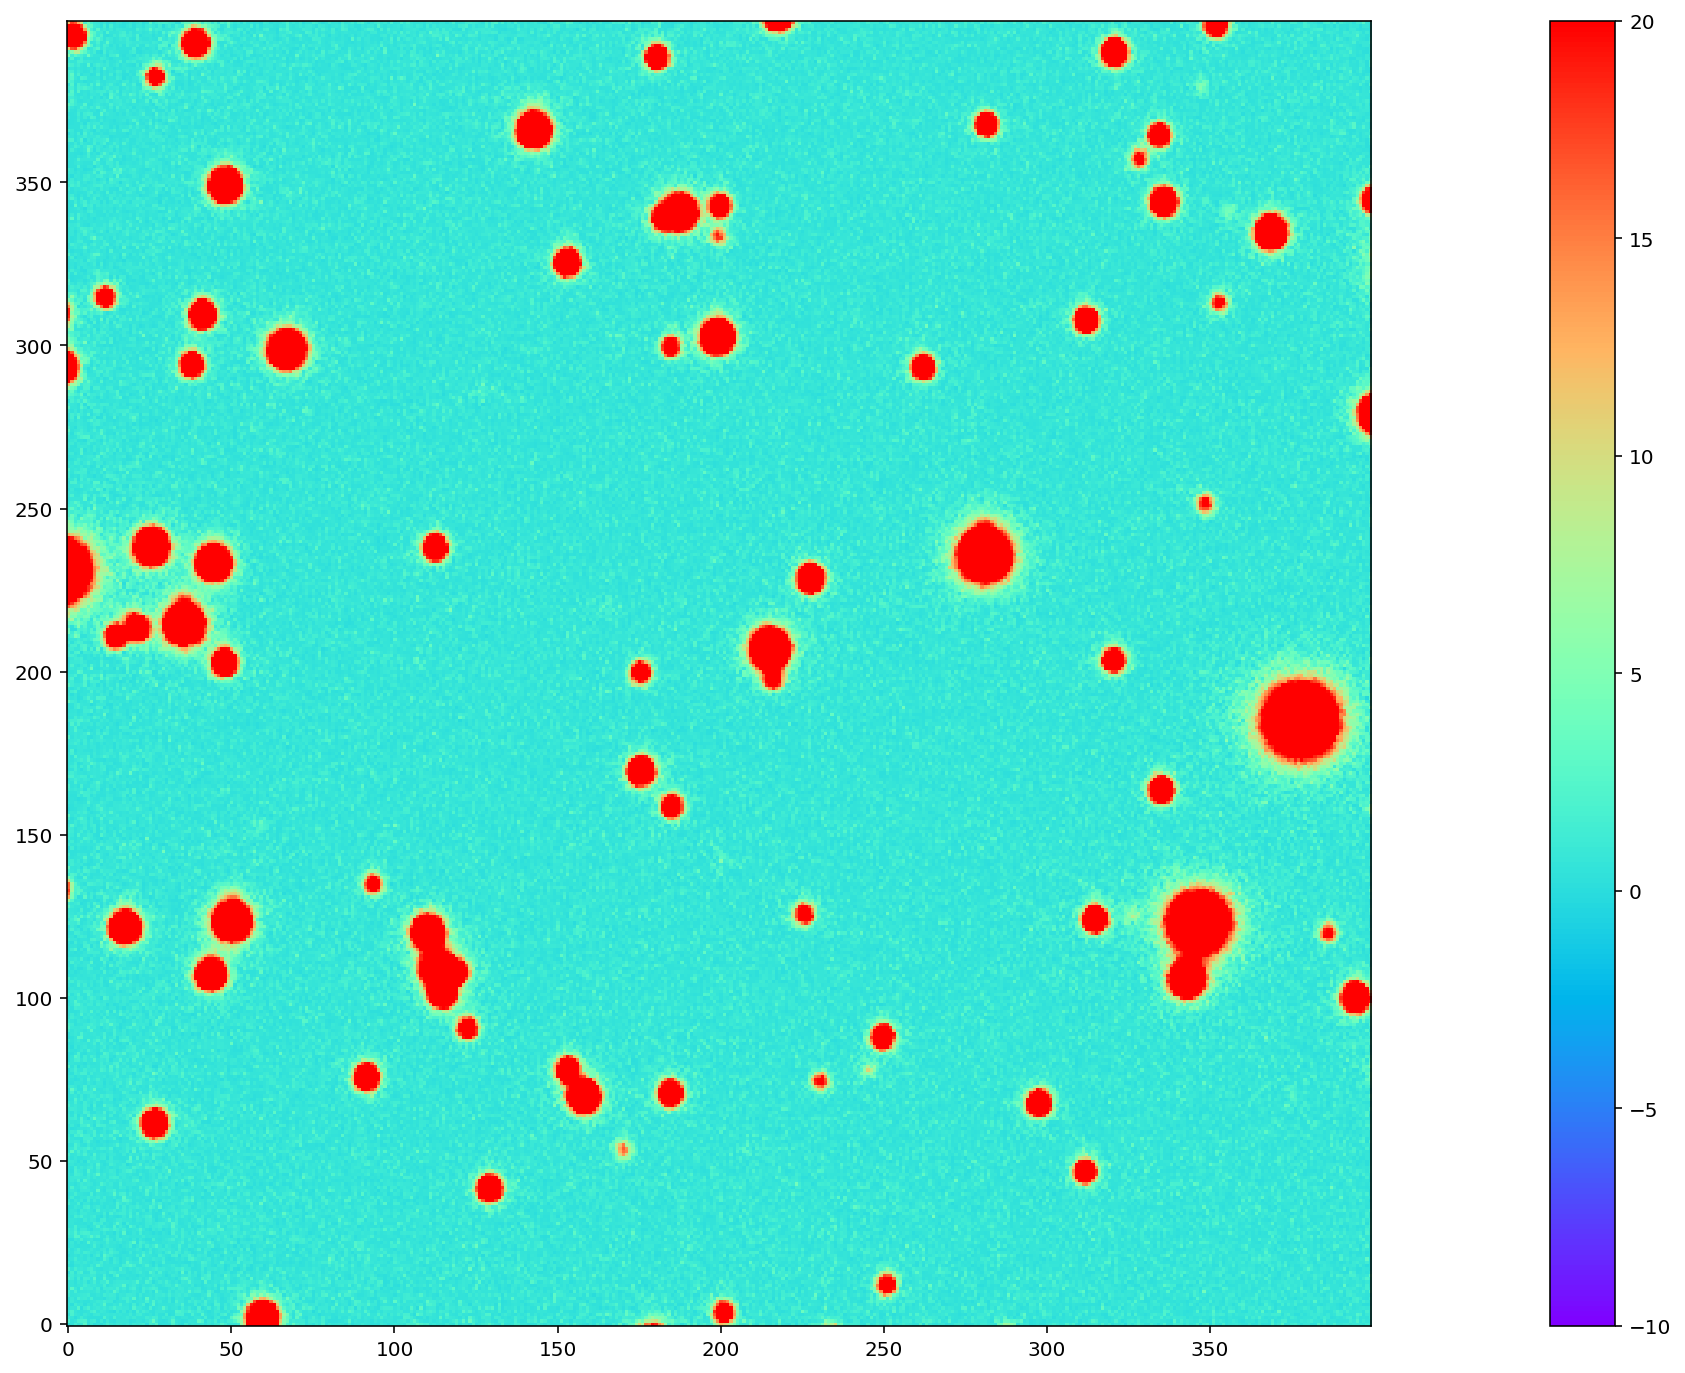

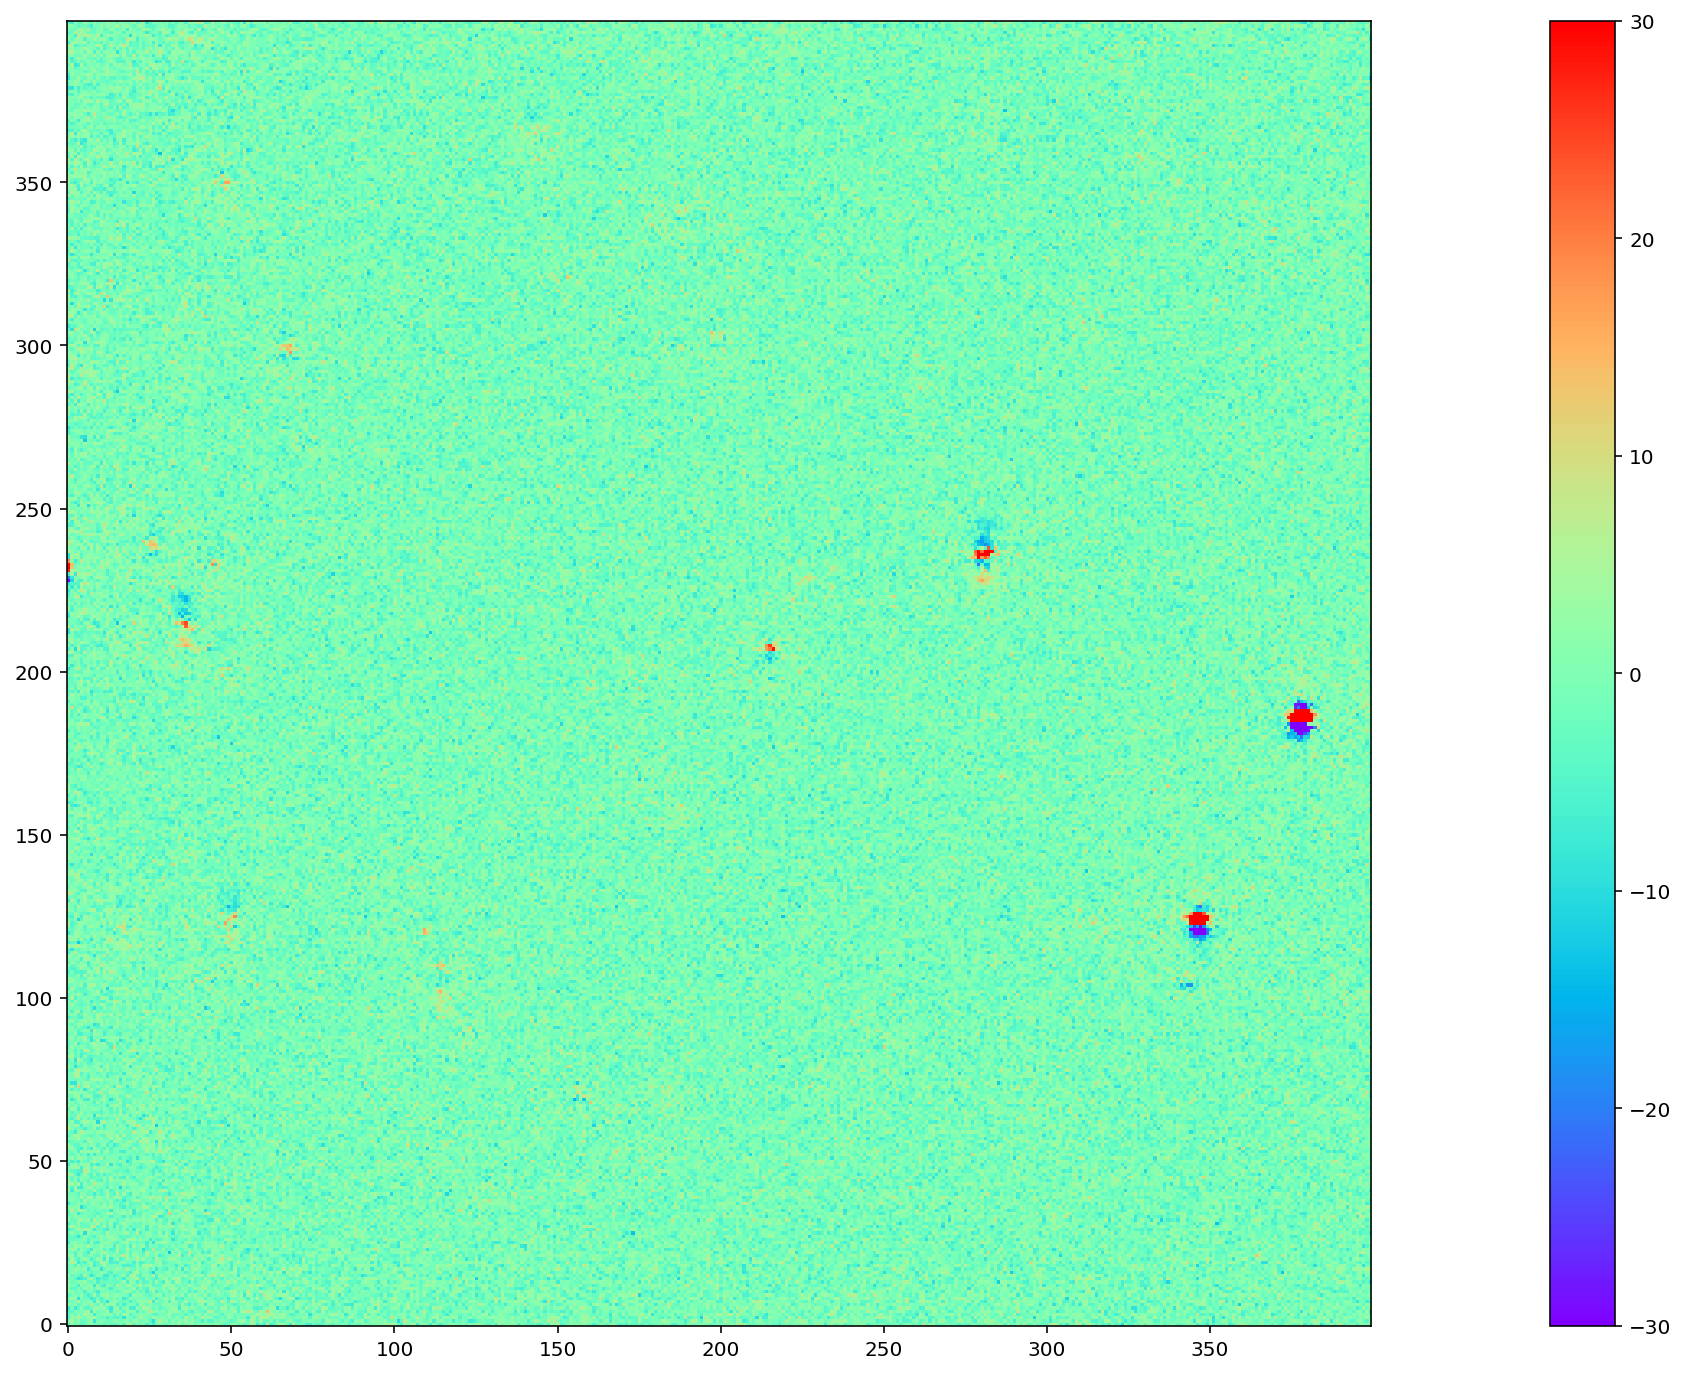

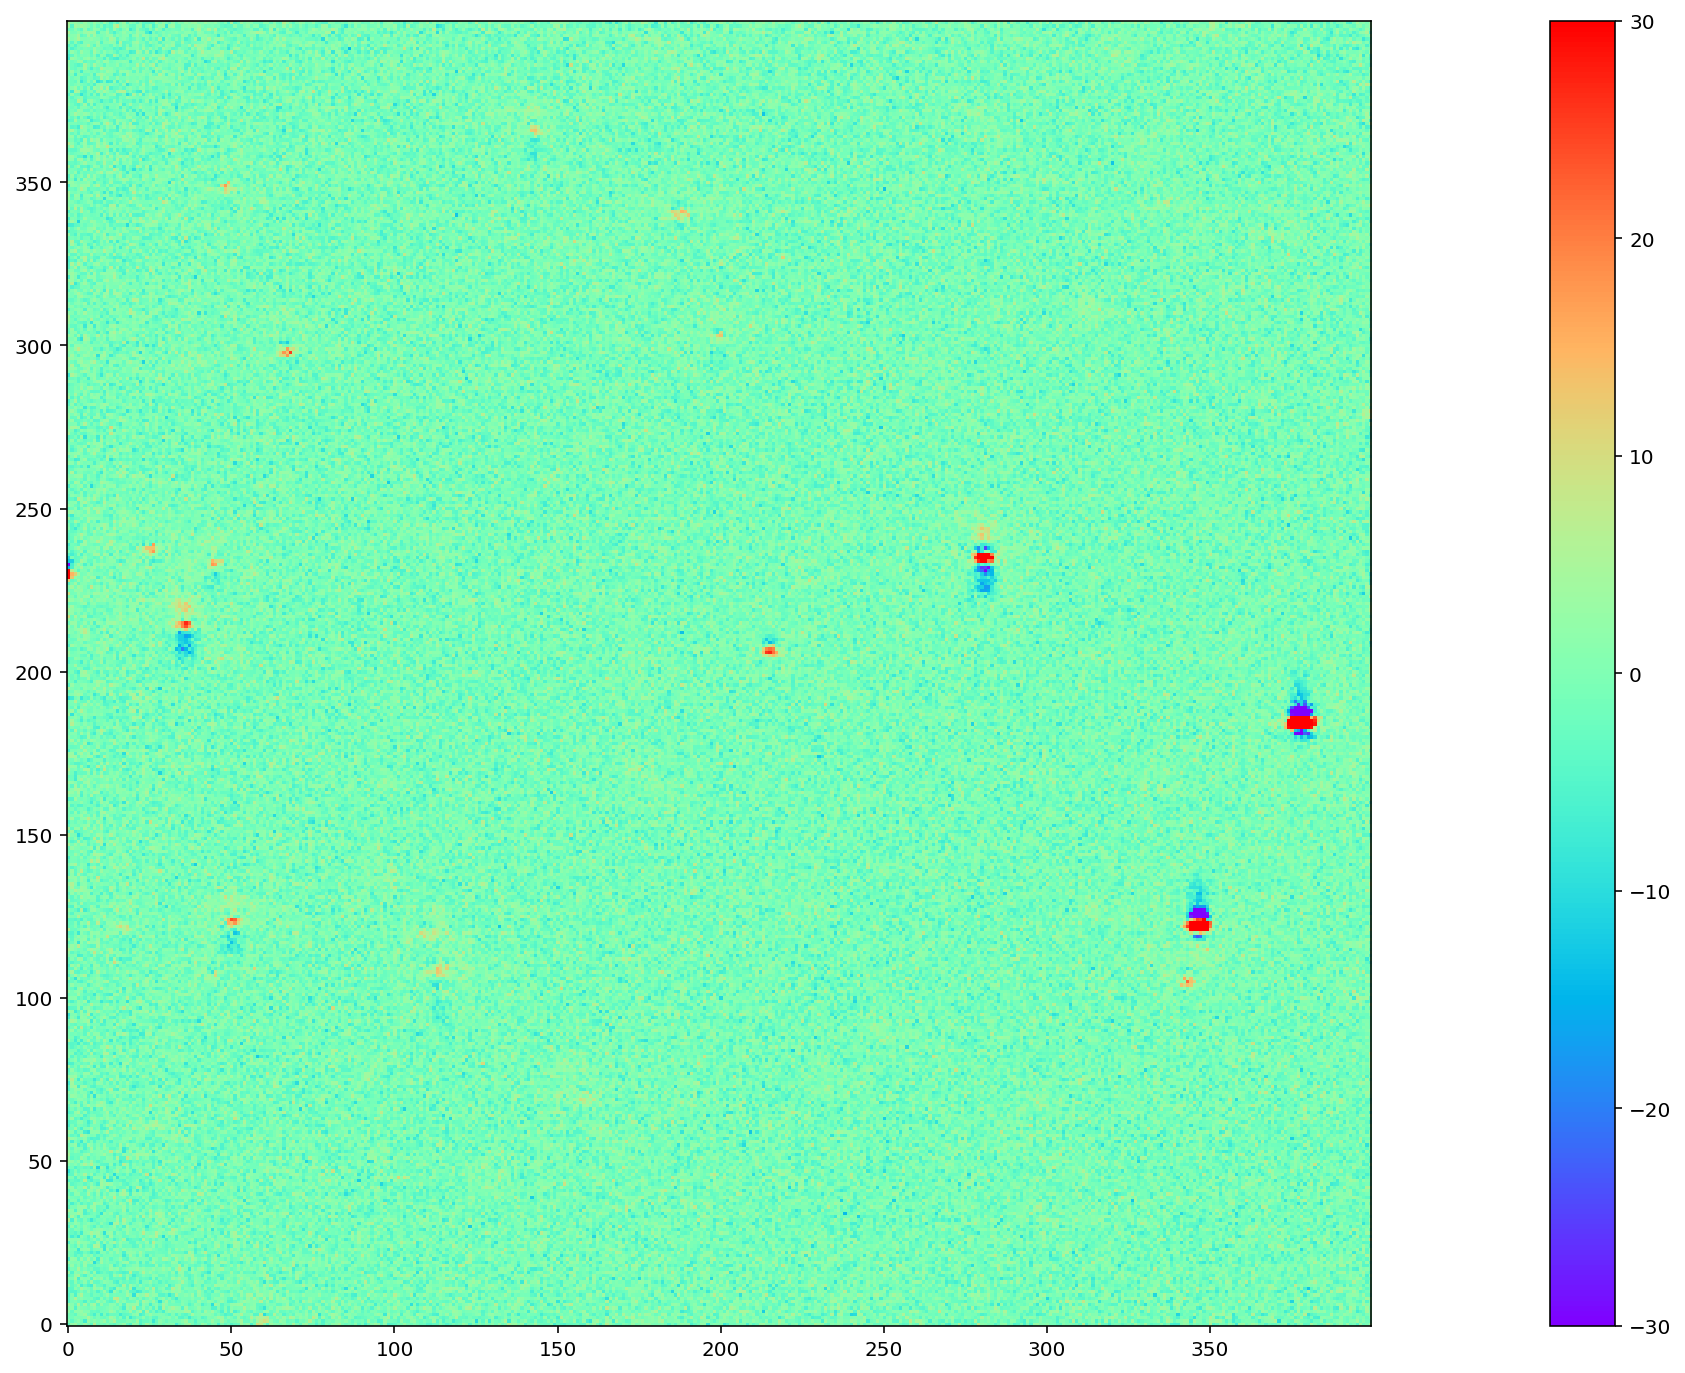

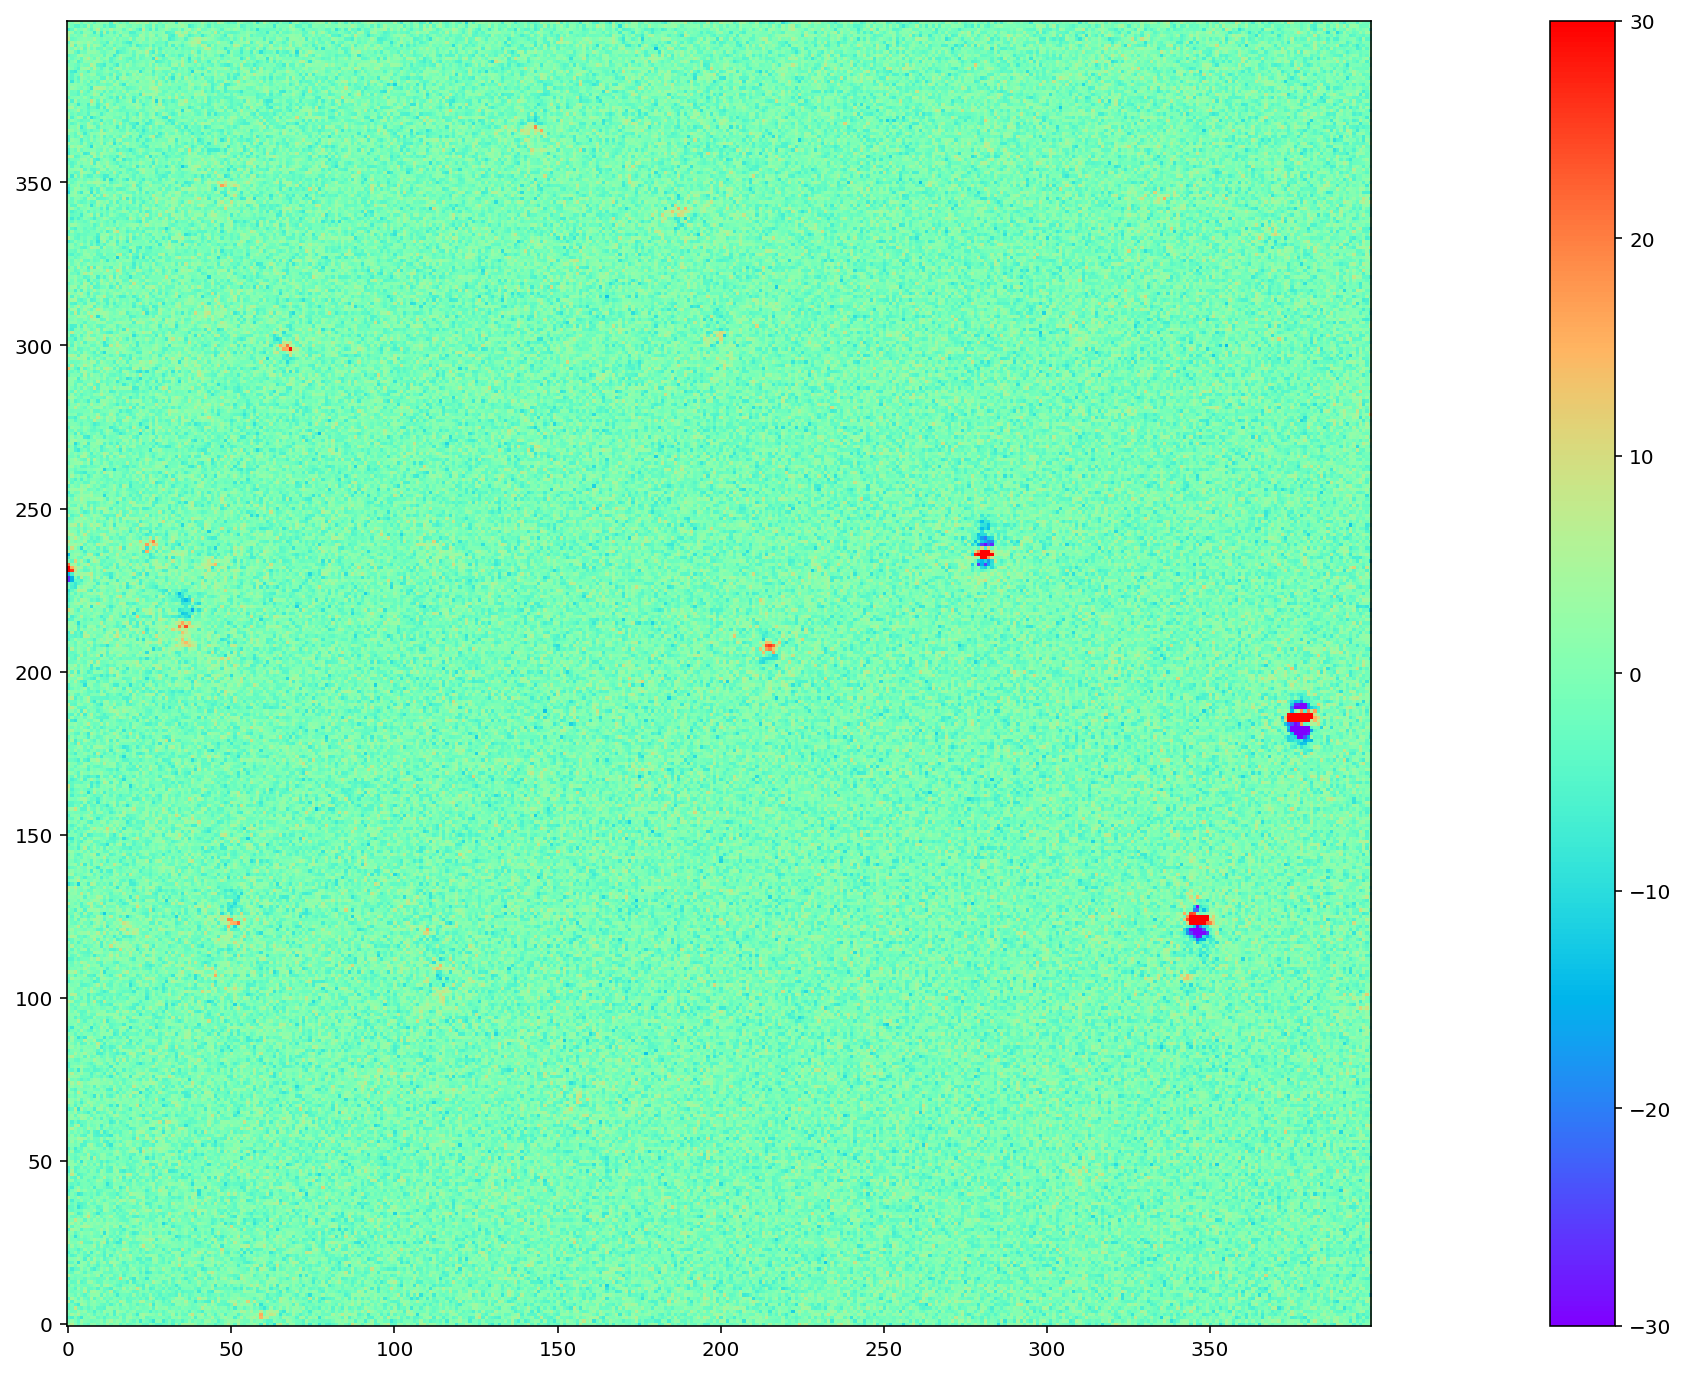

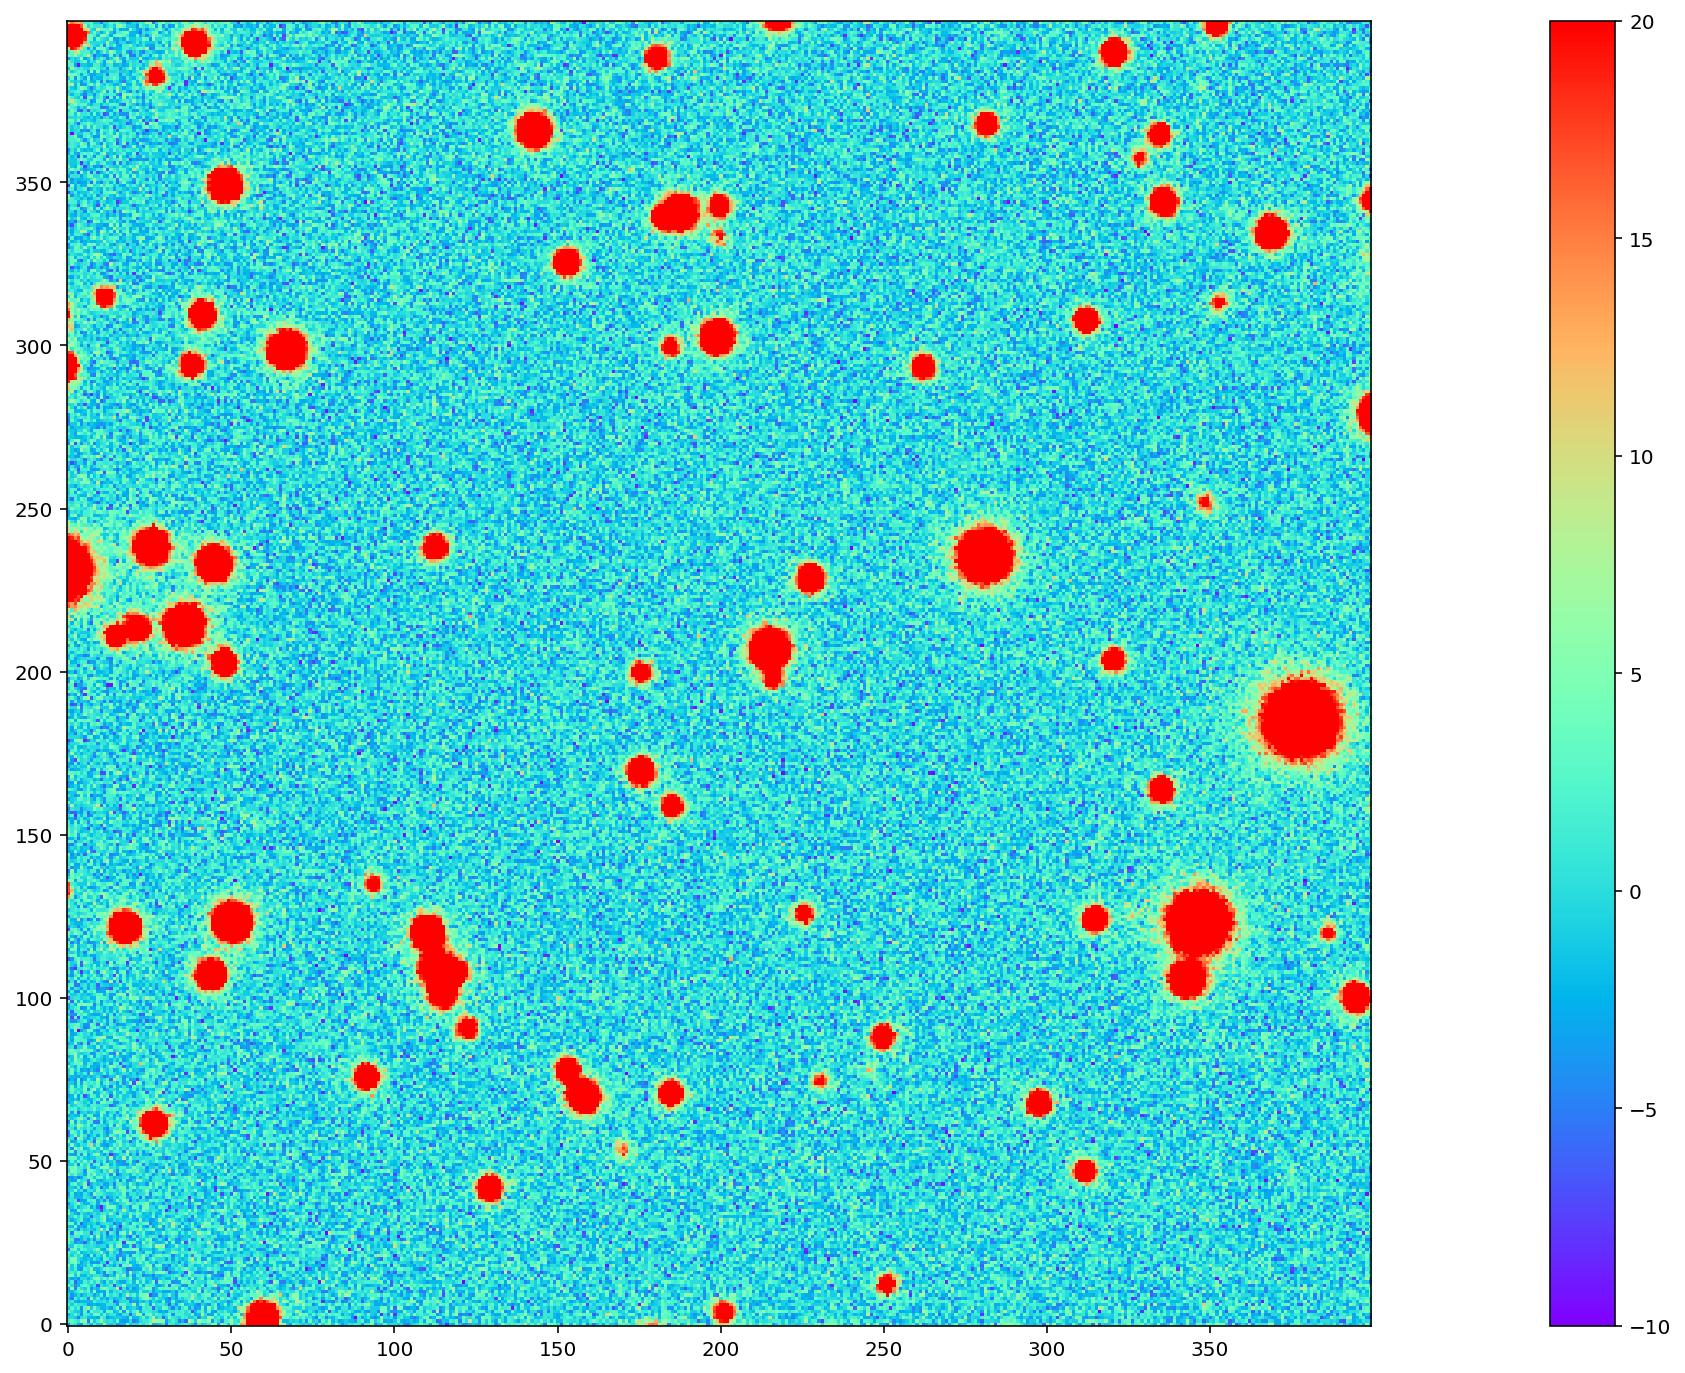

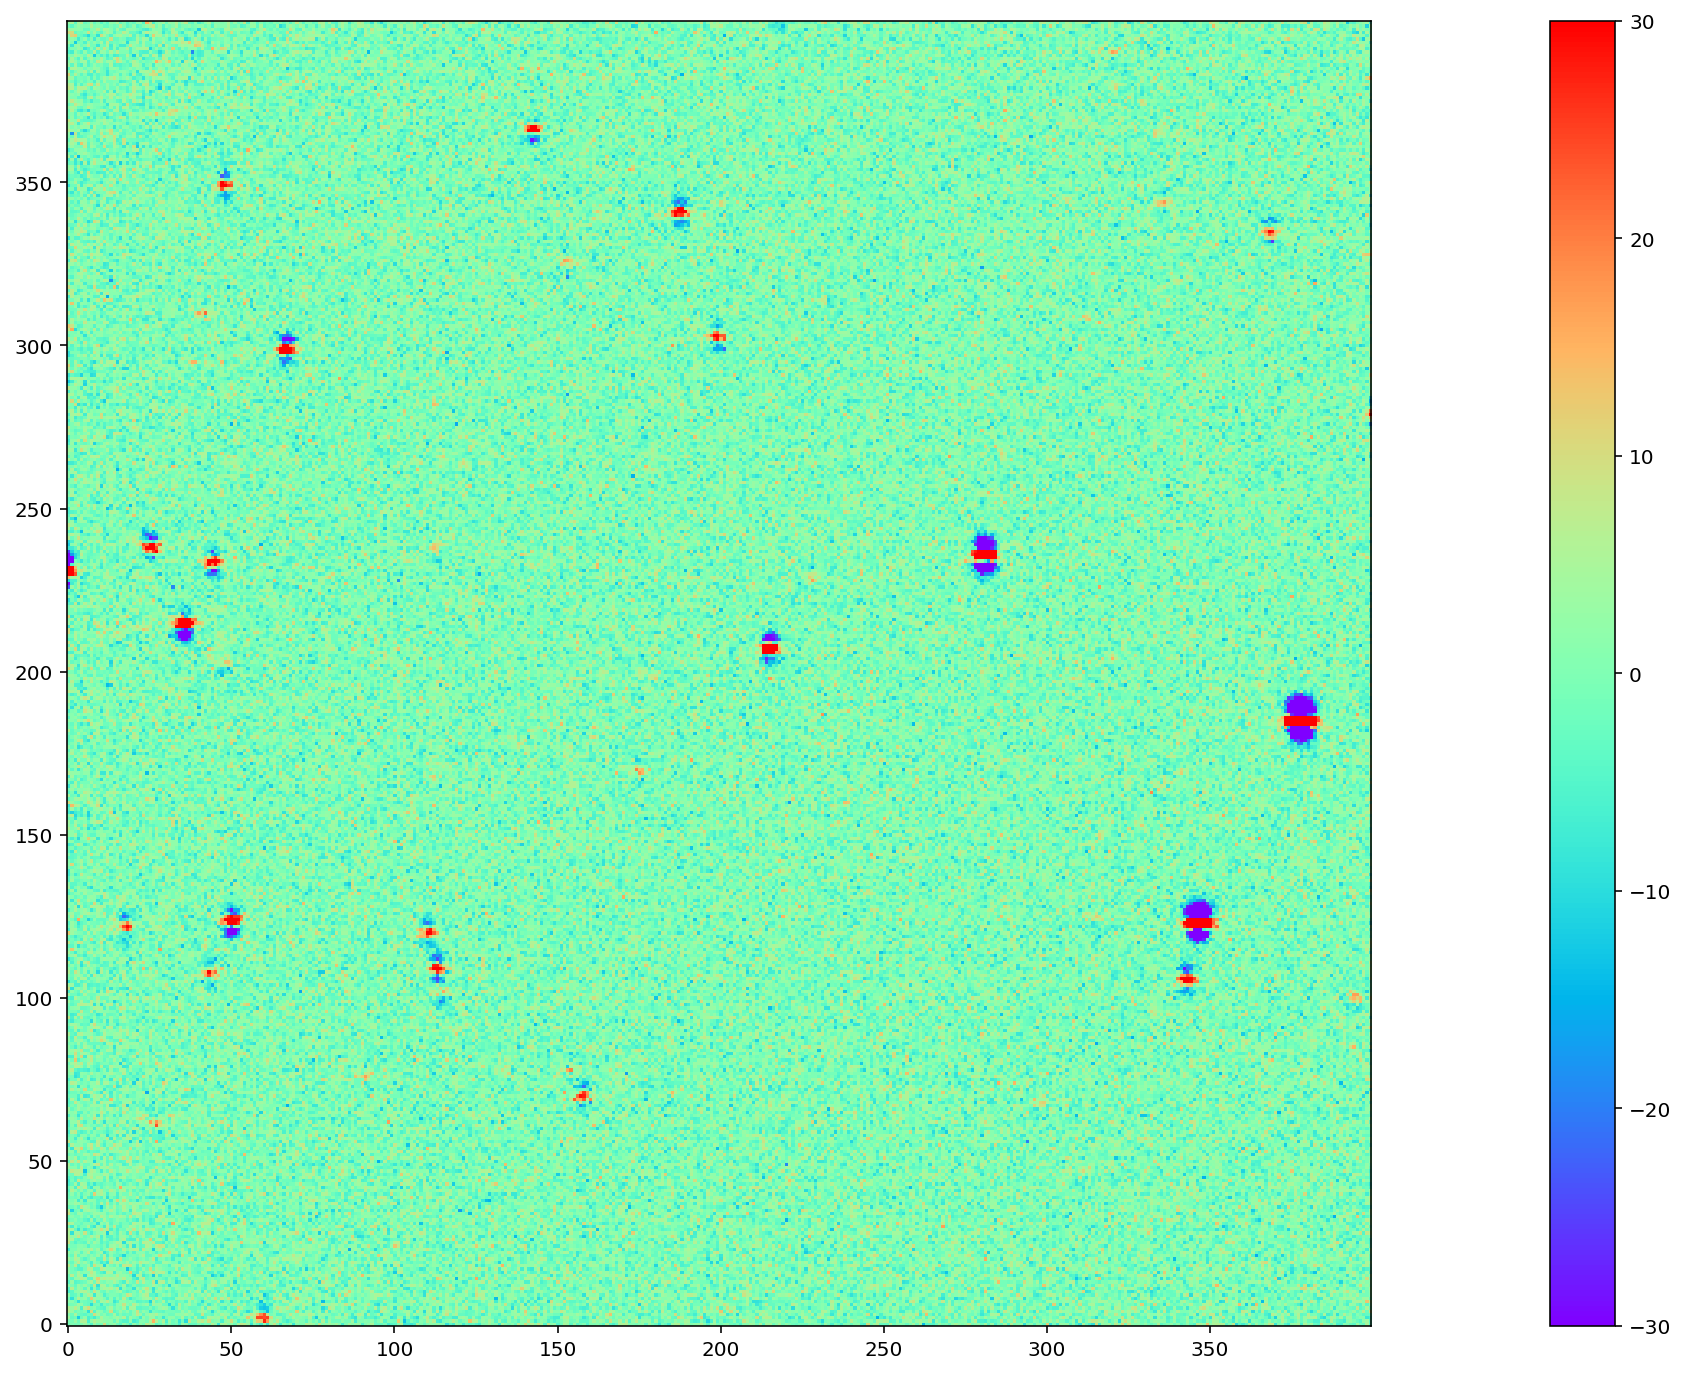

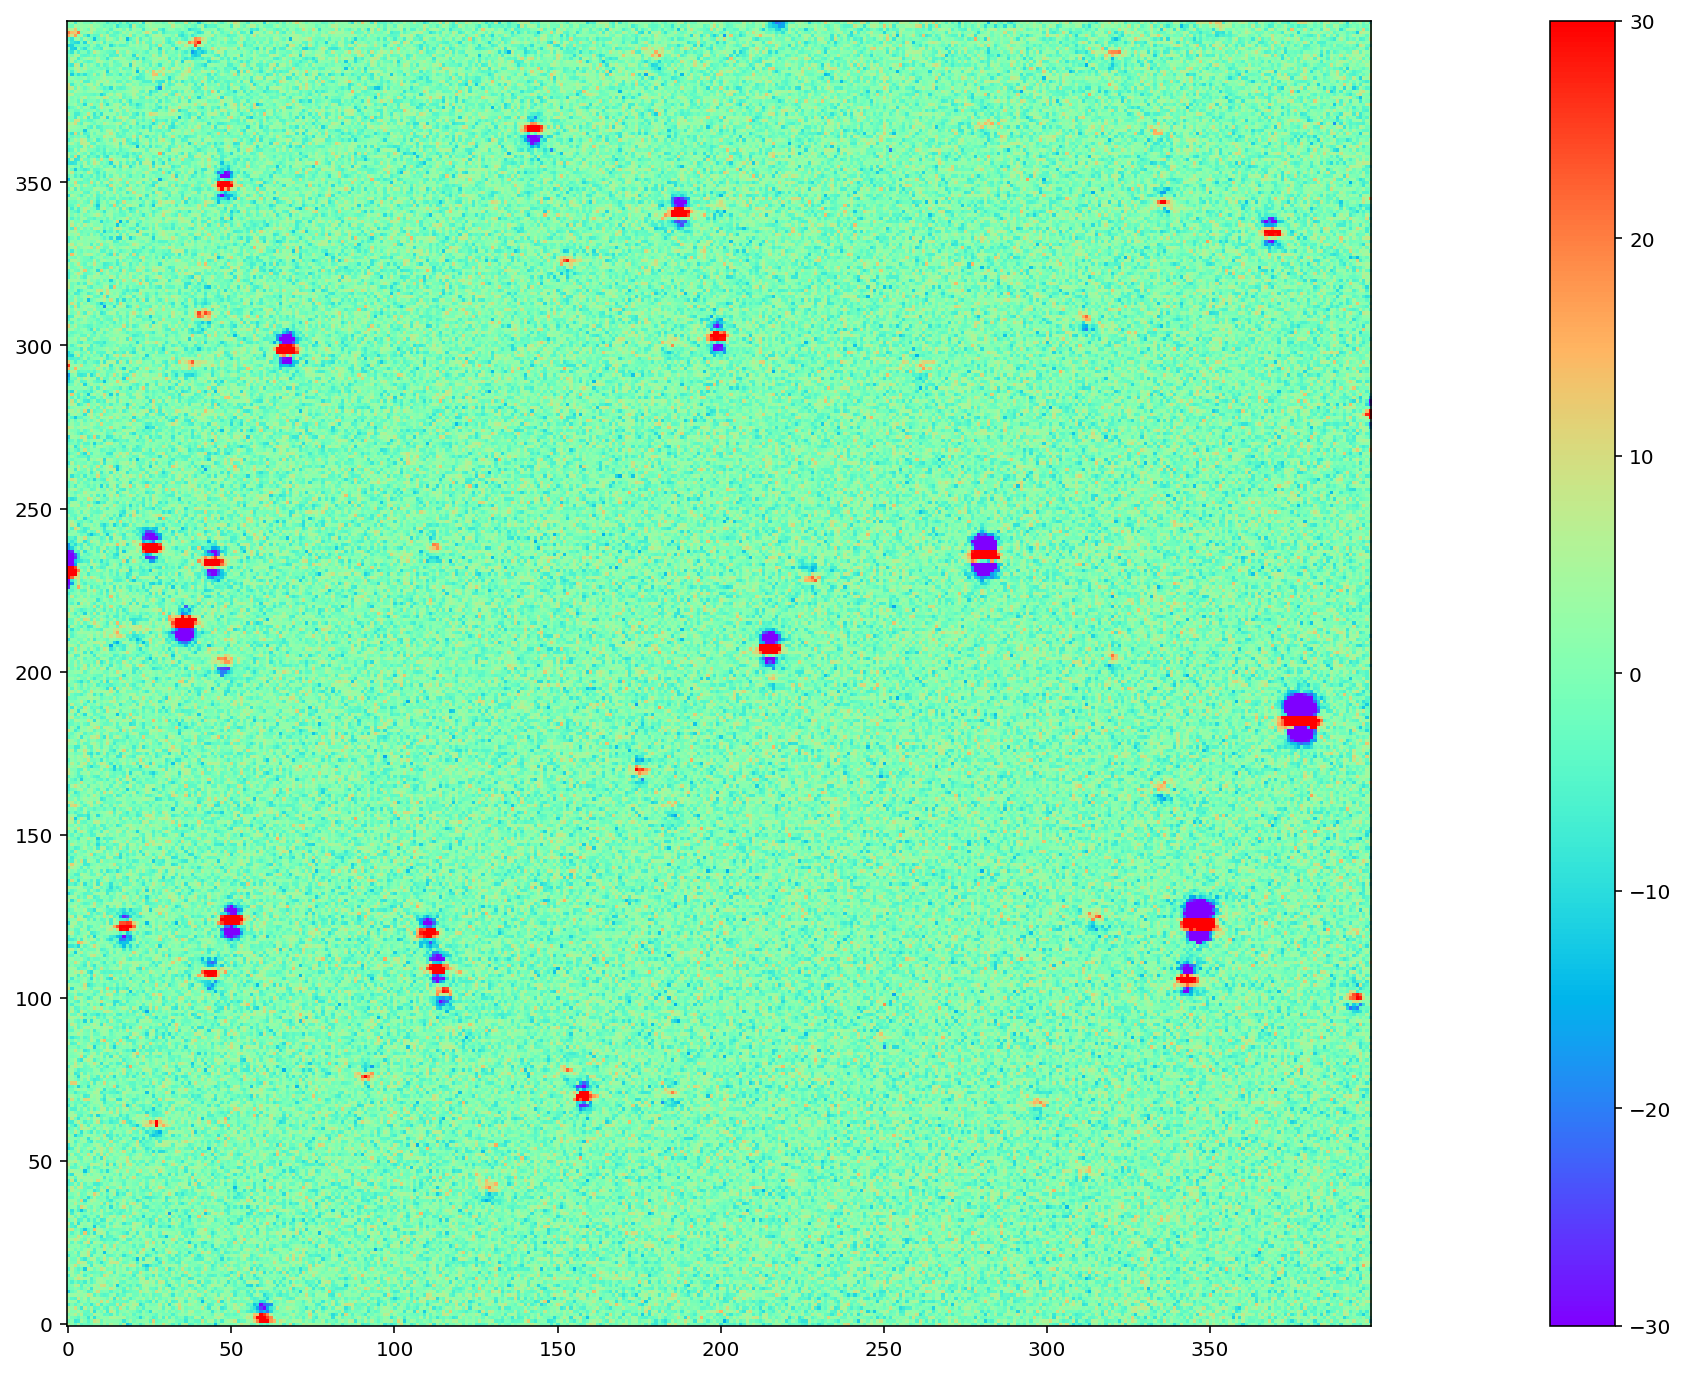

In [18]:
# x0=0
# y0=0
# dx=1024
# dy=1024
x0=200
dx=400
y0=300
dy=400
ref_diff = calexp_112.getMaskedImage().getImage().getArray() - calexp_108.getMaskedImage().getImage().getArray()
zen_diff = calexp_120.getMaskedImage().getImage().getArray() - calexp_108.getMaskedImage().getImage().getArray()
range_img = [-10,20]
range_diff = [-30,30]
scale = 1.
look(calexp_108.getMaskedImage().getImage().getArray(),x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=range_img, large=True)
look(im_arr[0],x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=range_img, large=True)
look(calexp_108.getMaskedImage().getImage().getArray() - im_arr[0]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_diff, large=True)
look(calexp_109.getMaskedImage().getImage().getArray() - im_arr[1]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_diff, large=True)
look(calexp_110.getMaskedImage().getImage().getArray() - im_arr[2]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_diff, large=True)
look(calexp_112.getMaskedImage().getImage().getArray(),x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=range_img, large=True)
look(ref_diff, x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=range_diff, large=True)
look(zen_diff, x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=range_diff, large=True)

In [17]:
self.create_skyMap()

In [19]:
self.export_model(model_repository="/Users/sullivan/LSST/simulations/test6_new/output_data_001b/")

In [11]:
from python.dcr_utils import kernel_1d
dcr_gen = self._dcr_generator(self.bandpass, pixel_scale=self.pixel_scale, elevation=Angle(np.radians(70.0)),
                              rotation_angle=Angle(0.), use_midpoint=False)
dcr_list = [dcr for dcr in dcr_gen]

In [12]:
dcr_list[0].dy

delta(start=0.84955415670110568, end=0.22681414140958325)

In [21]:
test_size = 21
k_test = kernel_1d(dcr_list[0].dy, test_size, n_substep=100, lanczos=4, debug_sinc=False)

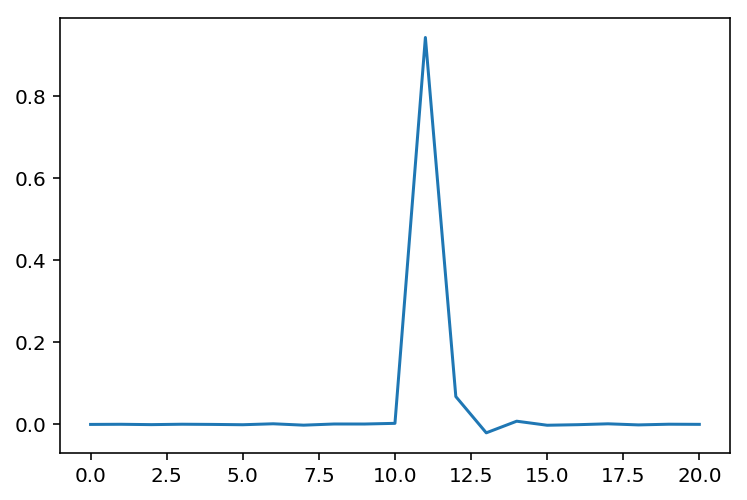

In [22]:
plt.plot(k_test)

In [27]:
k_test_fft = np.imag(np.fft.fft(k_test))

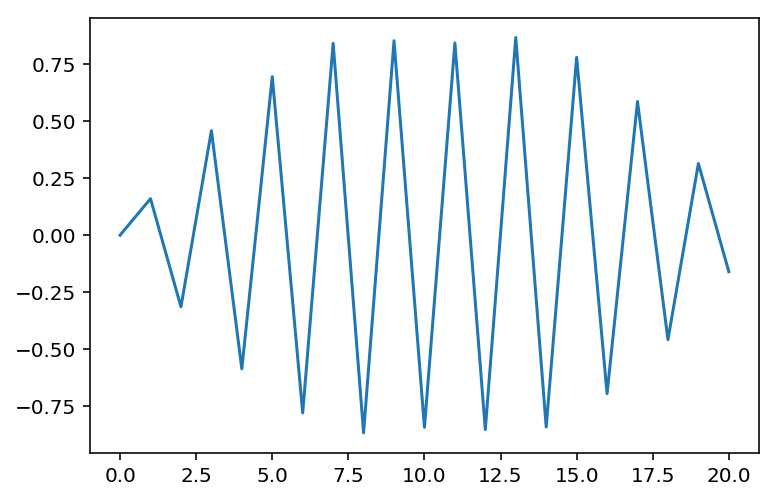

In [28]:
plt.plot(k_test_fft)

In [17]:
from python.dcr_utils import diff_refraction
from lsst.afw.geom import Angle

In [30]:
1./np.cos(np.radians(40.))

1.3054072893322783

In [22]:
test_angle = (diff_refraction(420., 460., Angle(np.radians(40.0))))

In [32]:
test_angle.asArcseconds()/self.pixel_scale.asArcseconds()

1.0821862312353134

In [22]:
butler = daf_persistence.Butler(inputs="./test_data/")
exposures = []
n_exp = 6
for exp_i in range(n_exp):
    dataId = {'visit': exp_i, 'raft': '2,2', 'sensor': '1,1', 'filter_name': 'g'}
    exposures.append(butler.get("calexp", dataId=dataId))

In [23]:
im_arr = [exp.getMaskedImage().getImage().getArray() for exp in exposures]

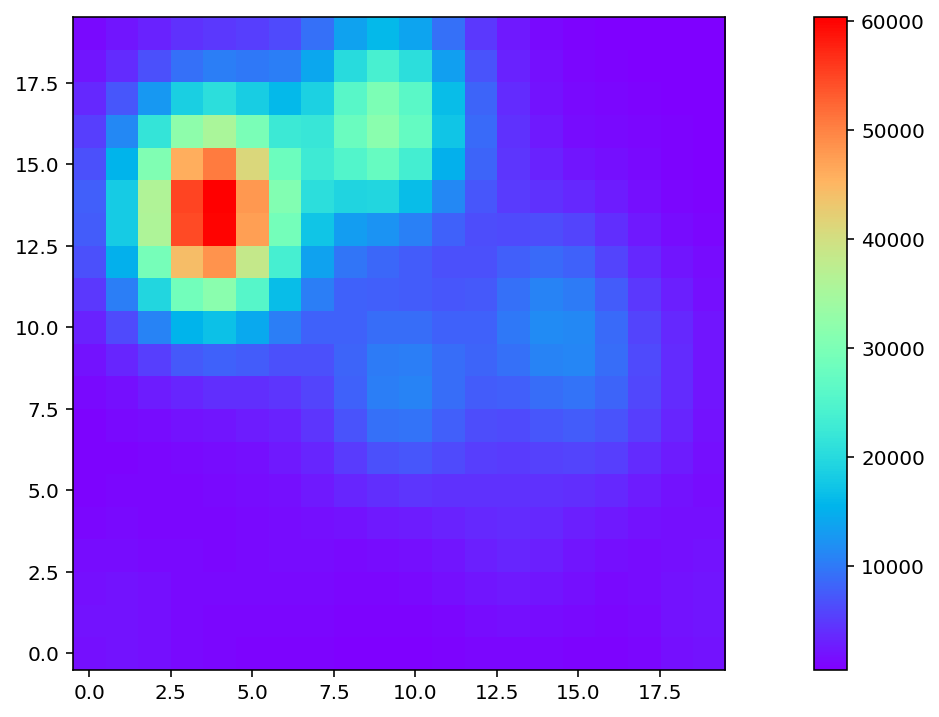

In [29]:
look(im_arr[0])